In [25]:
# import library

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report

In [26]:
# importing data 

loan = pd.read_csv(r"C:\Users\LENOVO\Desktop\All-folder\AlgoraProject\Final\Loan_default.csv")

In [27]:
# defining Feature and Target 

X = loan.drop(['LoanID', 'Default'], axis = 1)
y = loan['Default'].values

In [28]:
# Encode binary columns in X

binary_col = ['HasMortgage', 'HasDependents', 'HasCoSigner']

for col in binary_col:
    X[col] = X[col].map({'Yes': 1, 'No': 0})


In [30]:
# Encode binary columns in X

le = LabelEncoder()

cat_col = ['Education', 'EmploymentType', 'MaritalStatus', 'LoanPurpose']

for col in cat_col:
    X[col] = le.fit_transform(X[col])

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [32]:
ms = MinMaxScaler()

Xtrain = ms.fit_transform(X_train)
Xtest = ms.transform(X_test)

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [34]:
# Creating the model instance and the model

model2 = Sequential()

# building the model layers

model2.add(Dense(24, activation = 'relu'))
model2.add(Dropout(0.2))

# Binary Classficiation

model2.add(Dense(1, activation = 'sigmoid'))

# model compliation

model2.compile(loss = 'binary_crossentropy', optimizer = 'adam')

In [35]:
ES = EarlyStopping(monitor = 'val_loss', mode = 'min', patience = 25, verbose = 1)

In [40]:
model2.fit( x= Xtrain, y = y_train, epochs = 200, validation_data = (Xtest, y_test), callbacks = [ES])

Epoch 1/200
6384/6384 [==============================] - 16s 2ms/step - loss: 0.3252 - val_loss: 0.3153
Epoch 2/200
6384/6384 [==============================] - 24s 4ms/step - loss: 0.3209 - val_loss: 0.3143
Epoch 3/200
6384/6384 [==============================] - 18s 3ms/step - loss: 0.3198 - val_loss: 0.3136
Epoch 4/200
6384/6384 [==============================] - 16s 3ms/step - loss: 0.3193 - val_loss: 0.3132
Epoch 5/200
6384/6384 [==============================] - 19s 3ms/step - loss: 0.3189 - val_loss: 0.3127
Epoch 6/200
6384/6384 [==============================] - 23s 4ms/step - loss: 0.3185 - val_loss: 0.3122
Epoch 7/200
6384/6384 [==============================] - 37s 6ms/step - loss: 0.3178 - val_loss: 0.3119
Epoch 8/200
6384/6384 [==============================] - 40s 6ms/step - loss: 0.3174 - val_loss: 0.3111
Epoch 9/200
6384/6384 [==============================] - 36s 6ms/step - loss: 0.3175 - val_loss: 0.3106
Epoch 10/200
6384/6384 [==============================] - 37s 6m

In [41]:
loss2 = pd.DataFrame(model2.history.history)

<Axes: >

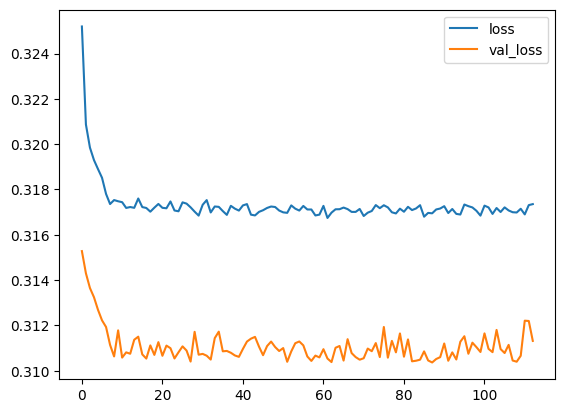

In [42]:
loss2.plot()

In [43]:
prediction2 = model2.predict(X_test)
y_pred2 = []
for i in prediction2:
    if i > 0.5:
        y_pred2.append(1)
    else:
        y_pred2.append(0)

print(classification_report(y_test, y_pred2))

1596/1596 [==============================] - 2s 1ms/step
              precision    recall  f1-score   support

           0       0.92      0.43      0.59     45170
           1       0.14      0.70      0.23      5900

    accuracy                           0.46     51070
   macro avg       0.53      0.57      0.41     51070
weighted avg       0.83      0.46      0.55     51070



## Another one

In [44]:
ms = MinMaxScaler()

X_train = ms.fit_transform(X_train)
X_test = ms.transform(X_test)

In [45]:
# Creating the model instance and the model

model3 = Sequential()

# building the model layers

model3.add(Dense(24, activation = 'relu'))
model3.add(Dropout(0.2))

# Binary Classficiation

model3.add(Dense(1, activation = 'sigmoid'))

# model compliation

model3.compile(loss = 'binary_crossentropy', optimizer = 'adam')

In [46]:
model3.fit( x= Xtrain, y = y_train, epochs = 100, validation_data = (Xtest, y_test), callbacks = [ES])

Epoch 1/100
6384/6384 [==============================] - 16s 2ms/step - loss: 0.3328 - val_loss: 0.3136
Epoch 2/100
6384/6384 [==============================] - 21s 3ms/step - loss: 0.3196 - val_loss: 0.3118
Epoch 3/100
6384/6384 [==============================] - 19s 3ms/step - loss: 0.3175 - val_loss: 0.3105
Epoch 4/100
6384/6384 [==============================] - 21s 3ms/step - loss: 0.3168 - val_loss: 0.3103
Epoch 5/100
6384/6384 [==============================] - 23s 4ms/step - loss: 0.3163 - val_loss: 0.3114
Epoch 6/100
6384/6384 [==============================] - 21s 3ms/step - loss: 0.3162 - val_loss: 0.3105
Epoch 7/100
6384/6384 [==============================] - 24s 4ms/step - loss: 0.3157 - val_loss: 0.3110
Epoch 8/100
6384/6384 [==============================] - 26s 4ms/step - loss: 0.3158 - val_loss: 0.3104
Epoch 9/100
6384/6384 [==============================] - 22s 4ms/step - loss: 0.3155 - val_loss: 0.3101
Epoch 10/100
6384/6384 [==============================] - 23s 4m

In [47]:
loss3 = pd.DataFrame(model3.history.history)

<Axes: >

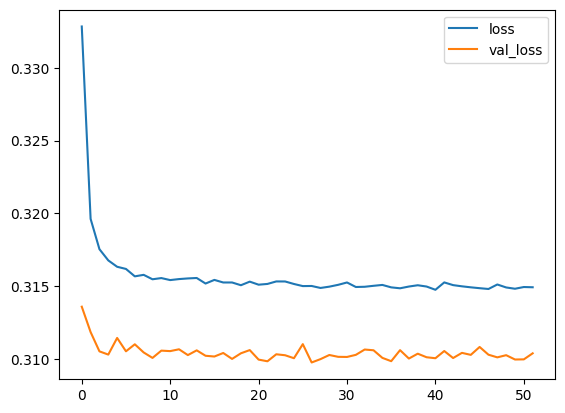

In [48]:
loss3.plot()

In [49]:
prediction3 = model3.predict(X_test)
y_pred3 = []
for i in prediction3:
    if i > 0.5:
        y_pred3.append(1)
    else:
        y_pred3.append(0)

print(classification_report(y_test, y_pred3))

1596/1596 [==============================] - 3s 2ms/step
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     45170
           1       0.66      0.06      0.11      5900

    accuracy                           0.89     51070
   macro avg       0.78      0.53      0.52     51070
weighted avg       0.86      0.89      0.84     51070



# Model 4

In [52]:
# Creating the model instance and the model

model4 = Sequential()

# building the model layers

model4.add(Dense(24, activation = 'relu'))
model4.add(Dropout(0.2))

# Binary Classficiation

model4.add(Dense(1, activation = 'sigmoid'))

# model compliation

model4.compile(loss = 'binary_crossentropy', optimizer = 'adam')

In [53]:
model4.fit( x= X_train, y = y_train, epochs = 30, validation_data = (X_test, y_test), callbacks = [ES])

Epoch 1/30
6384/6384 [==============================] - 14s 2ms/step - loss: 0.3311 - val_loss: 0.3138
Epoch 2/30
6384/6384 [==============================] - 16s 2ms/step - loss: 0.3193 - val_loss: 0.3115
Epoch 3/30
6384/6384 [==============================] - 17s 3ms/step - loss: 0.3175 - val_loss: 0.3108
Epoch 4/30
6384/6384 [==============================] - 19s 3ms/step - loss: 0.3168 - val_loss: 0.3117
Epoch 5/30
6384/6384 [==============================] - 17s 3ms/step - loss: 0.3160 - val_loss: 0.3102
Epoch 6/30
6384/6384 [==============================] - 17s 3ms/step - loss: 0.3164 - val_loss: 0.3111
Epoch 7/30
6384/6384 [==============================] - 16s 3ms/step - loss: 0.3161 - val_loss: 0.3102
Epoch 8/30
6384/6384 [==============================] - 18s 3ms/step - loss: 0.3157 - val_loss: 0.3101
Epoch 9/30
6384/6384 [==============================] - 17s 3ms/step - loss: 0.3157 - val_loss: 0.3105
Epoch 10/30
6384/6384 [==============================] - 26s 4ms/step - l

In [56]:
loss4 = pd.DataFrame(model4.history.history)

<Axes: >

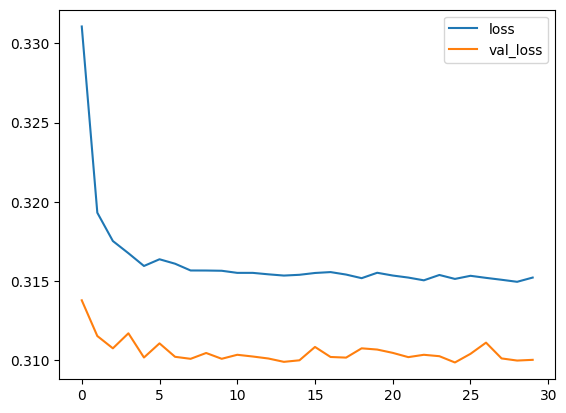

In [57]:
loss4.plot()

In [58]:
prediction3 = model3.predict(X_test)
y_pred4 = []
for i in prediction3:
    if i > 0.5:
        y_pred4.append(1)
    else:
        y_pred4.append(0)

print(classification_report(y_test, y_pred4))

1596/1596 [==============================] - 3s 2ms/step
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     45170
           1       0.66      0.06      0.11      5900

    accuracy                           0.89     51070
   macro avg       0.78      0.53      0.52     51070
weighted avg       0.86      0.89      0.84     51070



In [59]:
import pickle

In [60]:
pickle.dump(model4, open('modelloan', 'wb'))

In [61]:
model_loaded = pickle.load(open('modelloan', 'rb'))

In [62]:
model_loaded.predict(X_test)

1596/1596 [==============================] - 2s 1ms/step


array([[0.03699931],
       [0.0350065 ],
       [0.07441377],
       ...,
       [0.08656443],
       [0.07902057],
       [0.03570831]], dtype=float32)

In [36]:
from joblib import dump

dump(model3, 'loanmodel3.joblib')


['loanmodel3.joblib']

In [41]:
loan.loc[2]

LoanID            C1OZ6DPJ8Y
Age                       46
Income                 84208
LoanAmount            129188
CreditScore              451
MonthsEmployed            26
NumCreditLines             3
InterestRate           21.17
LoanTerm                  24
DTIRatio                0.31
Education           Master's
EmploymentType    Unemployed
MaritalStatus       Divorced
HasMortgage              Yes
HasDependents            Yes
LoanPurpose             Auto
HasCoSigner               No
Default                    1
Name: 2, dtype: object

In [54]:
pd.DataFrame(Xtest)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.725490,0.723410,0.356727,0.511840,0.949580,0.333333,0.936522,0.50,0.0625,1.000000,0.666667,1.0,1.0,1.0,0.75,0.0
1,0.745098,0.567203,0.516662,0.621129,0.453782,0.000000,0.573478,0.00,0.4125,0.333333,0.333333,0.0,1.0,1.0,0.50,1.0
2,0.156863,0.467939,0.287433,0.489982,0.882353,0.666667,0.696522,0.00,0.2375,0.666667,0.333333,0.5,1.0,1.0,0.50,1.0
3,0.156863,0.355816,0.023691,0.047359,0.991597,0.000000,0.552609,0.25,0.3875,0.333333,0.333333,1.0,0.0,0.0,0.25,1.0
4,0.117647,0.108634,0.066053,0.659381,0.857143,0.666667,0.566087,1.00,0.7375,1.000000,1.000000,1.0,0.0,1.0,0.25,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51065,0.647059,0.625754,0.674949,0.597450,0.201681,0.000000,0.653478,0.00,0.4500,1.000000,0.666667,0.0,1.0,1.0,0.00,1.0
51066,0.215686,0.200127,0.433959,0.129326,0.428571,1.000000,0.221739,0.50,0.5000,1.000000,0.666667,0.5,0.0,0.0,1.00,0.0
51067,0.960784,0.544520,0.561934,0.785064,0.428571,0.000000,0.908261,0.75,0.8625,0.000000,0.333333,0.0,0.0,0.0,0.50,0.0
51068,0.470588,0.752989,0.758974,0.342441,0.050420,0.000000,0.383913,1.00,0.2750,0.000000,0.000000,0.5,0.0,1.0,1.00,1.0


In [56]:
pd.DataFrame(y_test)

,0
0,0
1,0
2,0
3,0
4,0
...,...
51065,0
51066,0
51067,0
51068,0


In [57]:
pd.DataFrame(y_pred3)

,0
0,0
1,0
2,0
3,0
4,0
...,...
51065,0
51066,0
51067,0
51068,0


In [60]:
list = pd.concat([pd.DataFrame(Xtest),pd.DataFrame(y_test),pd.DataFrame(y_pred3)], axis = 1)

In [64]:
list.tail(20) 51060

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,0,0
51050,0.274510,0.943464,0.264840,0.375228,0.899160,0.000000,0.849565,0.25,0.1625,0.333333,0.666667,0.0,0.0,1.0,1.00,0.0,1,0
51051,0.803922,0.957102,0.567583,0.380692,0.563025,0.000000,0.726957,0.00,0.3750,1.000000,1.000000,0.5,1.0,1.0,0.75,1.0,0,0
51052,0.725490,0.699898,0.218119,0.981785,1.000000,0.000000,0.726087,0.25,0.4375,1.000000,0.666667,1.0,0.0,0.0,0.75,0.0,0,0
51053,0.470588,0.937775,0.593381,0.085610,0.983193,0.333333,0.662174,1.00,0.8125,0.000000,0.666667,0.0,1.0,0.0,0.00,1.0,0,0
51054,0.078431,0.776205,0.918142,0.959927,0.260504,0.000000,0.539130,1.00,0.8125,0.666667,1.000000,0.5,1.0,1.0,0.75,1.0,0,0
51055,0.647059,0.583144,0.129905,1.000000,0.554622,0.666667,0.788696,0.00,0.4000,0.000000,1.000000,0.5,0.0,1.0,0.00,0.0,0,0
51056,0.450980,0.415418,0.171806,0.748634,0.420168,0.333333,0.388261,1.00,0.5375,1.000000,0.666667,0.0,1.0,1.0,0.25,0.0,0,0
51057,0.725490,0.770175,0.596520,0.990893,0.924370,0.000000,0.973478,0.75,0.6500,0.333333,0.000000,0.5,0.0,0.0,1.00,0.0,0,0
51058,0.313725,0.630680,0.226899,0.480874,0.554622,1.000000,0.415217,0.50,0.1125,0.000000,0.000000,0.5,0.0,1.0,0.75,0.0,0,0
51059,0.117647,0.016304,0.129722,0.577413,0.663866,1.000000,0.229565,0.00,0.2625,1.000000,0.000000,0.5,0.0,1.0,0.75,0.0,0,0


In [68]:
X_test.iloc[51060]

Age                   18.00
Income             15576.00
LoanAmount        135763.00
CreditScore          330.00
MonthsEmployed         2.00
NumCreditLines         2.00
InterestRate          17.79
LoanTerm              12.00
DTIRatio               0.83
Education              0.00
EmploymentType         1.00
MaritalStatus          1.00
HasMortgage            1.00
HasDependents          1.00
LoanPurpose            0.00
HasCoSigner            1.00
Name: 230663, dtype: float64

Machine Model 

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [18]:
rfc = RandomForestClassifier()

In [22]:
rfc.fit(Xtrain, y_train)

RandomForestClassifier()

In [23]:
y_pred1 = rfc.predict(Xtest)

In [25]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94     45170
           1       0.66      0.05      0.09      5900

    accuracy                           0.89     51070
   macro avg       0.78      0.52      0.51     51070
weighted avg       0.86      0.89      0.84     51070



In [18]:
# Import Gridsearch 

from sklearn.model_selection import GridSearchCV

In [63]:
# Adjusting hyperparameter

n_estimators = [64, 100, 128, 200]
max_features = ['sqrt']
bootstrap = [True, False]
oob_score = [True, False]

In [20]:
RandomForestClassifier()

RandomForestClassifier()

In [64]:
# creating the param grid

param_grid = {'n_estimators' : n_estimators,
              'max_features' : max_features,
              'bootstrap' : bootstrap,
              'oob_score' : oob_score}


In [65]:
# Grid search instance with the model and para_grid

grid = GridSearchCV(rfc, param_grid )

In [67]:
grid.fit(X_train, y_train)

c:\Users\LENOVO\anaconda3\envs\tf\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
20 fits failed out of a total of 80.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\LENOVO\anaconda3\envs\tf\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\LENOVO\anaconda3\envs\tf\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\LENOVO\anaconda3\envs\tf\Lib\site-packages\sklearn\ensemble\_forest.py", li

GridSearchCV(estimator=RandomForestClassifier(max_features='auto',
                                              n_estimators=200,
                                              oob_score=True),
             param_grid={'bootstrap': [True, False], 'max_features': ['sqrt'],
                         'n_estimators': [64, 100, 128, 200],
                         'oob_score': [True, False]})

In [68]:
# checking for the best param_grid for our model

grid.best_params_

{'bootstrap': True,
 'max_features': 'sqrt',
 'n_estimators': 100,
 'oob_score': True}

In [70]:
y_pred2 = grid.predict(X_test)

In [71]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94     45170
           1       0.64      0.05      0.09      5900

    accuracy                           0.89     51070
   macro avg       0.77      0.52      0.52     51070
weighted avg       0.86      0.89      0.84     51070



In [34]:
from joblib import dump

In [37]:
dump(grid, 'loanmodel4.joblib')

['loanmodel4.joblib']

In [12]:
from sklearn.ensemble import RandomForestClassifier

In [72]:
rfc = RandomForestClassifier(bootstrap = True, max_features = 'sqrt', n_estimators = 100, oob_score = True)

In [ ]:
RandomForestClassifier  

In [74]:
# Fitting the model with the data set

rfc.fit(X_train, y_train)

RandomForestClassifier(oob_score=True)

In [75]:
# Predicitng with the evalaution data set

pred3 = rfc.predict(X_test)

In [76]:
print(classification_report(y_test, pred3))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94     45170
           1       0.63      0.04      0.08      5900

    accuracy                           0.89     51070
   macro avg       0.76      0.52      0.51     51070
weighted avg       0.86      0.89      0.84     51070



In [77]:
pickle.dump(rfc, open('model1', 'wb'))